<a href="https://colab.research.google.com/github/prakhar-chaurasiya/final_project_nism/blob/main/combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# order data

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
np.set_printoptions(suppress=True)
stock = 'sbin'

order_file = f'/content/drive/MyDrive/Colab Notebooks/FA/HIGHFREQ-DATA/highfreq/{stock}.order'
order_df = pd.read_csv(order_file, sep='|', header=None)
order_df.columns =['session', 'orderid', 'side', 'action', 'order_time', 'price', 'fquant', 'dquant', 'market', 'ioc', 'stoploss', 'triggerprice']
jiffy = 65536
ist = 330*60 # this is to be added in local machine (5:30 = 330*60 sec)
order_df['time'] = order_df['order_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy))#.strftime('%Y-%m-%d %H:%M:%S'))
# order_df['min'] = order_df['order_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy).strftime('%H:%M:%S'))
# order_df['sec'] = pd.to_datetime(order_df['time']).dt.strftime("%H%M%S").astype('int')
order_df['min'] = pd.to_datetime(order_df['time']).dt.strftime("%H%M").astype('int')
order_df['market_num'] = pd.get_dummies(order_df['market'], drop_first=True)

In [2]:
def normalize_data(x : np.array) -> np.array:
  return (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))

In [3]:
def standardize_data(x : np.array) -> np.array:
  return (x - x.mean(axis=0))/x.std(axis=0)

In [4]:
timeframe = 'min'
allsides = order_df[['side', timeframe, 'price', 'fquant', 'action', 'market_num']].values

In [5]:
trading_time = []
for i in range(9, 16):
  if i in range(10, 15):
    for j in range(0, 60):
      trading_time.append(i*100+j)
  elif i == 9:
    for j in range(15, 60):
      trading_time.append(i*100+j)
  else:
    for j in range(0, 30):
      trading_time.append(i*100+j)

In [ ]:
trading_time

In [6]:
n = len(trading_time)

## Buy

In [6]:
buy = allsides[allsides[:, 0] == 'B'][:, 1:]
buy_tf = tf.convert_to_tensor(buy, dtype=tf.int32)

In [7]:
buy_train = list()
b = 0
for i in trading_time:
  temp = buy_tf[buy_tf[:, 0]==i][:, 1:]
  x = np.zeros((50000, 4))
  # print(i) 
  x[:temp.shape[0]] = standardize_data(temp.numpy())
  if i != 915:
    b = np.vstack((b, x))
    
  else:
    b = x
  buy_train.append(x)
b

array([[-0.06377079, -0.55164953, -1.45981454, -0.20329746],
       [-0.0606409 , -0.64082461, -1.45981454, -0.20329746],
       [-0.05255536, -0.47258096, -1.45981454, -0.20329746],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### r

In [56]:
b.reshape(-1, 50000, 4)

array([[[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
        [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
        [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.10337096,  0.36029564,  0.59228019, -0.1502324 ],
        [ 0.13395803, -0.71861854,  0.59228019, -0.1502324 ],
        [ 0.11395879, -0.42397531,  0.59228019, -0.1502324 ],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]])

In [55]:
c = np.stack((buy_train[0], buy_train[1])).shape


(2, 50000, 4)

In [57]:
buy_train[-1]

array([[ 0.10337096,  0.36029564,  0.59228019, -0.1502324 ],
       [ 0.13395803, -0.71861854,  0.59228019, -0.1502324 ],
       [ 0.11395879, -0.42397531,  0.59228019, -0.1502324 ],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
for i in buy_train:
  b = np.stack

In [37]:
len(buy_train)

375

In [ ]:
buy_train = np.asarray(buy_train)
buy_train

In [47]:
buy_tf[buy_tf[:, 0]==1300][:, 1:]

<tf.Tensor: shape=(25002, 4), dtype=int32, numpy=
array([[203905,      3,      1,      0],
       [203895,   1206,      3,      0],
       [203845,   1159,      3,      0],
       ...,
       [203780,    204,      3,      0],
       [203375,      2,      4,      0],
       [203780,    204,      1,      0]], dtype=int32)>

In [25]:
z = np.zeros((30000, 4)) 
z = buy_tf[buy_tf[:, 0]==i][:, 1:]
z

<tf.Tensor: shape=(2756, 4), dtype=int32, numpy=
array([[205345,    131,      1,      0],
       [205345,    141,      1,      0],
       [205345,     71,      1,      0],
       ...,
       [205245,     10,      4,      0],
       [     0,     20,      1,      1],
       [     0,      1,      1,      1]], dtype=int32)>

In [27]:
x = np.zeros((30000, 4)) 
x[:z.shape[0]] = z

In [28]:
x

array([[205345.,    131.,      1.,      0.],
       [205345.,    141.,      1.,      0.],
       [205345.,     71.,      1.,      0.],
       ...,
       [     0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.]])

In [ ]:
np.pad(z.numpy(), 30000-z.shape[0])

In [39]:
buy_train[0].ravel().reshape(-1, 4)

array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
       ...,
       [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
       [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
       [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]])

In [ ]:
buy_tf[buy_tf[:, 0]==1500][:, 1:]

In [53]:
standardize_data(temp.numpy()).tolist()

array([[ 0.25780876, -0.38966533, -2.01977826, -0.24160243],
       [ 0.25780876, -0.36918983, -2.01977826, -0.24160243],
       [ 0.25780876, -0.51251836, -2.01977826, -0.24160243],
       ...,
       [ 0.25566969, -0.63741893,  0.56809198, -0.24160243],
       [-4.13466635, -0.61694343, -2.01977826,  4.13903116],
       [-4.13466635, -0.65584689, -2.01977826,  4.13903116]])

In [58]:
def data_generator(thislist):
  for data in thislist:
    yield data

In [61]:
next(data_generator(buy_train))

array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
       ...,
       [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
       [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
       [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]])

In [ ]:
def data_generator():
    while True:
        length = np.random.randint(2, 10) #Variable length sequences
        x_train = np.random.random((1, length, 2)) #batch, seq, features
        y_train = np.random.random((1,1)) #batch, score
        yield x_train, y_train

In [49]:
tf.stack([temp, buy_tf[buy_tf[:, 0]==1500][:, 1:]], axis=1)

InvalidArgumentError: ignored

In [46]:
temp

<tf.Tensor: shape=(2756, 4), dtype=int32, numpy=
array([[205345,    131,      1,      0],
       [205345,    141,      1,      0],
       [205345,     71,      1,      0],
       ...,
       [205245,     10,      4,      0],
       [     0,     20,      1,      1],
       [     0,      1,      1,      1]], dtype=int32)>

In [41]:
a = [0]
b = [0, 1, 1]
c = [0, 1] 
np.array([a, b, c])

<ipython-input-41-136b13c9110d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([a, b, c])


array([list([0]), list([0, 1, 1]), list([0, 1])], dtype=object)

In [ ]:
buy_train.ravel()

## Sell

In [ ]:
list(map(lambda x: x.shape[0], buy_train))

In [8]:
sell = allsides[allsides[:, 0] == 'S'][:, 1:]
sell_tf = tf.convert_to_tensor(sell, dtype=tf.int32)

In [ ]:
# sell_train = list()
# for i in trading_time:
#   temp = sell_tf[sell_tf[:, 0]==i][:, 1:]
#   sell_train.append(standardize_data(temp.numpy()))
# sell_train

In [9]:
sell_train = list()
s = 0
for i in trading_time:
  temp = sell_tf[sell_tf[:, 0]==i][:, 1:]
  x = np.zeros((50000, 4))
  # print(i) 
  x[:temp.shape[0]] = standardize_data(temp.numpy())
  if i != 915:
    s = np.vstack((s, x))
  else:
    s = x
  sell_train.append(x)
s

array([[-0.04892266, -0.99540861, -1.40304264, -0.11168795],
       [-0.05089866, -1.11888468, -1.40304264, -0.11168795],
       [-0.050734  , -1.11888468, -1.40304264, -0.11168795],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [65]:
s.reshape(-1, 120000, 4)

array([[[ 0.04689235,  9.63639659, -2.51229002, -0.07842909],
        [ 0.10963571, -1.16594148, -2.51229002, -0.07842909],
        [ 0.23324014, -0.43101503, -2.51229002, -0.07842909],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.02979878,  0.33861328,  0.45730565, -0.06905813],
        [ 0.00884499,  0.33861328,  0.45730565, -0.06905813],
        [-0.00820216,  0.33861328, -2.55036751, -0.06905813],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.08961482, -0.89758395, -0.53390864, -0.08614737],
        [ 0.08875583, -0.92653074,  0.4579784 , -0.08614737],
        [ 0.08761051, -0.80350686, -0.53390864, -0.08614737],
        ...,
        [ 0.        ,  0.  

In [ ]:
sell_train = np.asarray(sell_train)
sell_train

In [ ]:
list(map(lambda x: x.shape[0], sell_train))

# trade data

In [12]:
trade_file = f'/content/drive/MyDrive/Colab Notebooks/FA/HIGHFREQ-DATA/trade_data/{stock.upper()}.trade'
trade_df = pd.read_csv(trade_file, sep='|', header=None)
trade_df.columns =['record', 'segment', 'trade_no', 
                    'trade_time', 'series', 'trade_price', 
                    'trade_qty', 'buy_order_no', 'buy_algo', 
                    'client', 'sell_order_no', 'sell_algo']
jiffy = 65536
ist = 330*60 # this is to be added in local machine (5:30 = 330*60 sec)
trade_df['time'] = trade_df['trade_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy))#.strftime('%Y-%m-%d %H:%M:%S'))
# trade_df['min'] = trade_df['trade_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy-ist).strftime('%H:%M:%S'))
# trade_df['sec'] = pd.to_datetime(trade_df['time']).dt.strftime('%H%M%S').astype('int')
trade_df['trade_price'] = trade_df['trade_price']/100 
trade_df['min'] = pd.to_datetime(trade_df['time']).dt.strftime('%H%M').astype('int')
trade_df['price_*_qty'] = trade_df['trade_qty'] * trade_df['trade_price']

In [13]:
timeframe = 'min'
trade_np = trade_df[[timeframe, 'price_*_qty', 'trade_qty']].values
rows, row_idx = np.unique(trade_np[:, 0], return_index=True)
wpvtt = np.zeros((rows.shape[0], 4), dtype=np.float32)
for i, (r, id1, id2) in enumerate(zip(rows, row_idx, row_idx[1:])):
    wpvtt[i, 0] = r
    wpvtt[i, 1] = trade_np[id1:id2, 1:2].T.sum()/trade_np[id1:id2, 2:].T.sum()
    wpvtt[i, 2] = trade_np[id1:id2, 2:].T.sum()
    wpvtt[i, 3] = trade_np[id1:id2, 2:].shape[0]

temp = trade_df.groupby(timeframe).get_group(trade_df[timeframe].unique()[-1])[['trade_qty', 'price_*_qty']].sum()
wpvtt[-1, 0] = trade_df[timeframe].unique()[-1]
wpvtt[-1, 1] = temp[1]/temp[0]
wpvtt[-1, 2] = temp[0]
wpvtt[-1, 3] = trade_df.groupby(timeframe).get_group(trade_df[timeframe].unique()[-1])[['trade_qty', 'price_*_qty']].shape[0]
wpvtt

array([[   907.     ,    298.8    , 126298.     ,    668.     ],
       [   915.     ,    299.26654, 605338.     ,   2473.     ],
       [   916.     ,    299.48035, 246229.     ,   1057.     ],
       ...,
       [  1556.     ,    302.55   ,    526.     ,      4.     ],
       [  1557.     ,    302.55   ,    420.     ,      3.     ],
       [  1559.     ,    302.55   ,     66.     ,      2.     ]],
      dtype=float32)

In [14]:
trade_train = list()
for i in trading_time:
  trade_train.append(wpvtt[wpvtt[:, 0] == i][:, 1][0])
# trade_train 

In [15]:
trade_train = np.array(trade_train)

In [71]:
trade_train.reshape(375, 1, 1)

array([[[2018.2084]],

       [[2027.2004]],

       [[2027.149 ]],

       [[2026.2079]],

       [[2025.0115]],

       [[2022.4629]],

       [[2020.1365]],

       [[2021.5073]],

       [[2021.222 ]],

       [[2021.9636]],

       [[2018.3273]],

       [[2015.7954]],

       [[2014.8093]],

       [[2013.4652]],

       [[2010.4727]],

       [[2006.6628]],

       [[2008.6715]],

       [[2008.1741]],

       [[2007.2856]],

       [[2007.1791]],

       [[2007.4149]],

       [[2007.6713]],

       [[2006.5397]],

       [[2007.0222]],

       [[2006.0593]],

       [[2004.9751]],

       [[2003.7891]],

       [[2002.6346]],

       [[2003.9152]],

       [[2005.8441]],

       [[2006.1698]],

       [[2005.7234]],

       [[2007.2202]],

       [[2008.3558]],

       [[2009.01  ]],

       [[2010.0619]],

       [[2011.8916]],

       [[2012.2404]],

       [[2011.7916]],

       [[2010.5087]],

       [[2011.2734]],

       [[2012.6517]],

       [[2012.7734]],

       [[20

# model

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Model, Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, Reshape, TimeDistributed, \
Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, concatenate
from tensorflow.keras.optimizers import Adam

In [ ]:
# model_cnn_lstm = Sequential()
# model_cnn_lstm.add(Conv1D(128, 3, activation='relu', input_shape=(timestamp, features)))
# model_cnn_lstm.add(MaxPooling1D(pool_size=2))
# model_cnn_lstm.add(Dropout(0.2))
# model_cnn_lstm.add(Conv1D(128, 3, activation='relu', input_shape=(timestamp, features)))
# model_cnn_lstm.add(MaxPooling1D(pool_size=2))
# model_cnn_lstm.add(Dropout(0.2))
# model_cnn_lstm.add(LSTM(units = 64, return_sequences = True))
# model_cnn_lstm.add(Dropout(0.2))
# model_cnn_lstm.add(LSTM(units = 64, return_sequences = False))
# model_cnn_lstm.add(Dropout(0.2))
# model_cnn_lstm.add(Dense(64, activation=tf.keras.activations.tanh))
# model_cnn_lstm.add(Dropout(0.2))
# model_cnn_lstm.add(Dense((covar_shape*covar_shape)))
# model_cnn_lstm.add(Reshape((covar_shape, covar_shape)))
# model_cnn_lstm.summary()

# model_cnn_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [26]:
inputA = Input(shape=(50000, 4), name='buy')
inputB = Input(shape=(50000, 4), name='sell')

buy = Conv1D(64, 3, activation="relu")(inputA)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Conv1D(64, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Conv1D(64, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Model(inputs=inputA, outputs=buy)

sell = Conv1D(64, 3, activation="relu")(inputB)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Conv1D(64, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Conv1D(64, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Model(inputs=inputB, outputs=sell)

combined = concatenate([buy.output, sell.output])

final = LSTM(128, return_sequences=True)(combined)
final = LSTM(128, return_sequences=True)(final)
final = LSTM(128, return_sequences=False)(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
final = Dense(1, activation="linear", name='final')(final)

model = Model(inputs=[buy.input, sell.input], outputs=final)

In [27]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 buy (InputLayer)               [(None, 50000, 4)]   0           []                               
                                                                                                  
 sell (InputLayer)              [(None, 50000, 4)]   0           []                               
                                                                                                  
 conv1d_12 (Conv1D)             (None, 49998, 64)    832         ['buy[0][0]']                    
                                                                                                  
 conv1d_15 (Conv1D)             (None, 49998, 64)    832         ['sell[0][0]']                   
                                                                                           

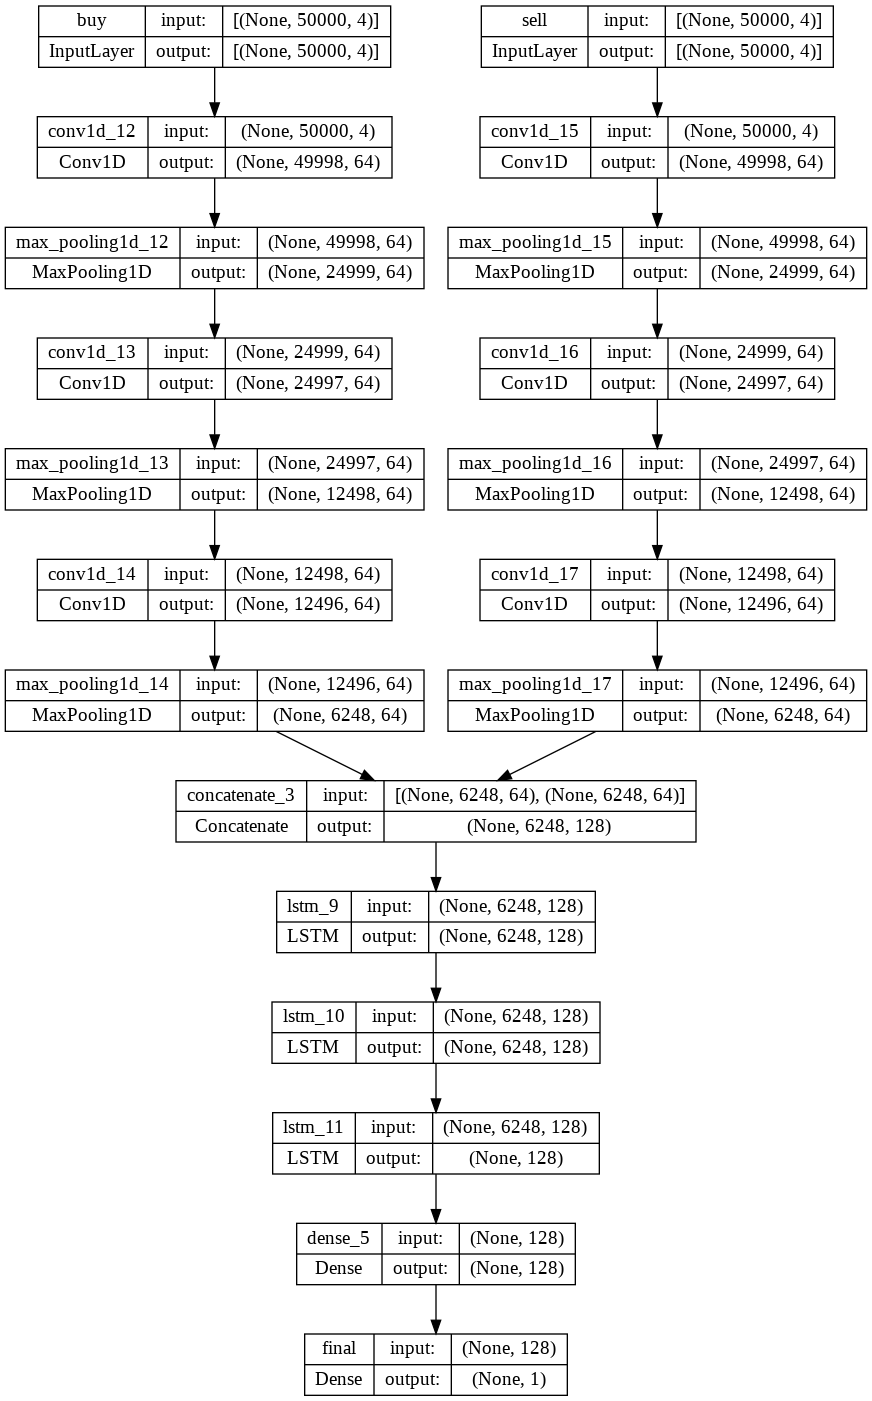

In [28]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [29]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [30]:
history = model.fit({"buy": b.reshape(-1, 50000, 4), "sell": s.reshape(-1, 50000, 4)}, {"final": trade_train}, epochs=10)

Epoch 1/10
12/12 [==============================] - 17s 1s/step - loss: 98.7672
Epoch 2/10
12/12 [==============================] - 12s 961ms/step - loss: 95.4193
Epoch 3/10
12/12 [==============================] - 11s 953ms/step - loss: 94.4647
Epoch 4/10
12/12 [==============================] - 11s 946ms/step - loss: 93.8685
Epoch 5/10
12/12 [==============================] - 11s 946ms/step - loss: 93.2816
Epoch 6/10
12/12 [==============================] - 11s 944ms/step - loss: 92.7115
Epoch 7/10
12/12 [==============================] - 11s 954ms/step - loss: 92.1509
Epoch 8/10
12/12 [==============================] - 12s 956ms/step - loss: 91.5963
Epoch 9/10
12/12 [==============================] - 12s 958ms/step - loss: 91.0461
Epoch 10/10
12/12 [==============================] - 13s 1s/step - loss: 90.5233


In [66]:
tf.convert_to_tensor(buy_train[0])

<tf.Tensor: shape=(15858, 4), dtype=float64, numpy=
array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
       ...,
       [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
       [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
       [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]])>